### **Bag of n_grams: Exercise**

- Fake news refers to misinformation or disinformation in the country which is spread through word of mouth and more recently through digital communication such as What's app messages, social media posts, etc.

- Fake news spreads faster than Real news and creates problems and fear among groups and in society.

- We are going to address these problems using classical NLP techniques and going to classify whether a given message/ text is **Real or Fake Message**.

- You will use a Bag of n-grams to pre-process the text and apply different classification algorithms.

- Sklearn CountVectorizer has the inbuilt implementations for Bag of Words.


In [1]:
from sklearn.feature_extraction.text import CountVectorizer

n = CountVectorizer(ngram_range=(1,3))
text = ("I'm going to eat pizza during christmas")
n.fit([text])
n.vocabulary_

{'going': 6,
 'to': 12,
 'eat': 3,
 'pizza': 9,
 'during': 1,
 'christmas': 0,
 'going to': 7,
 'to eat': 13,
 'eat pizza': 4,
 'pizza during': 10,
 'during christmas': 2,
 'going to eat': 8,
 'to eat pizza': 14,
 'eat pizza during': 5,
 'pizza during christmas': 11}

In [2]:
corpus = [
    "Thor ate pizza",
    "Loki is tall",
    "Loki is eating pizza"
]

In [3]:
import spacy

nlp = spacy.load("en_core_web_sm")
def preprocess(text):
    doc = nlp(text)
    filtered_tokens = []

    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
# convert the filtered tokens list into a string
    return " ".join(filtered_tokens)


c:\Users\Ola\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:

preprocess("He ran all the way home")

'run way home'

In [5]:
corpus_processed = [preprocess(text) for text in corpus]
corpus_processed

['Thor eat pizza', 'Loki tall', 'Loki eat pizza']

In [6]:
n.fit(corpus_processed)
n.vocabulary_

{'thor': 8,
 'eat': 0,
 'pizza': 6,
 'thor eat': 9,
 'eat pizza': 1,
 'thor eat pizza': 10,
 'loki': 2,
 'tall': 7,
 'loki tall': 5,
 'loki eat': 3,
 'loki eat pizza': 4}

In [7]:
n.transform(["thor ate pizza"]).toarray()

array([[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0]], dtype=int64)

### **Modelling without Pre-processing Text data**

In [8]:
import pandas as pd

df = pd.read_json("../NLP/nlp-tutorials-main/11_bag_of_n_grams/news_dataset.json")
print(df.shape)
df.head()

(12695, 2)


,text,category
0,Watching Schrödinger's Cat Die University of C...,SCIENCE
1,WATCH: Freaky Vortex Opens Up In Flooded Lake,SCIENCE
2,Entrepreneurs Today Don't Need a Big Budget to...,BUSINESS
3,These Roads Could Recharge Your Electric Car A...,BUSINESS
4,Civilian 'Guard' Fires Gun While 'Protecting' ...,CRIME


In [9]:
df.category.value_counts()

BUSINESS    4254
SPORTS      4167
CRIME       2893
SCIENCE     1381
Name: category, dtype: int64

In [1]:
# Handling imbalance with undersampling
min_samples = 1381
df_bus = df[df.category=="BUSINESS"].sample(min_samples, random_state=2022)
df_sports = df[df.category=="SPORTS"].sample(min_samples, random_state=2022)
df_crime = df[df.category=="CRIME"].sample(min_samples, random_state=2022)
df_sci = df[df.category=="SCIENCE"].sample(min_samples, random_state=2022)

NameError: name 'df' is not defined

In [11]:
df_news = pd.concat([df_bus, df_sports, df_crime, df_sci], axis=0)

In [12]:
df_news.head()

,text,category
11967,GCC Business Leaders Remain Confident in the F...,BUSINESS
2912,From the Other Side; an Honest Review from Emp...,BUSINESS
3408,"Mike McDerment, CEO of FreshBooks, Talks About...",BUSINESS
502,How to Market Your Business While Traveling th...,BUSINESS
5279,How to Leverage Intuition in Decision-making I...,BUSINESS


In [13]:
df_news.category.value_counts()

BUSINESS    1381
SPORTS      1381
CRIME       1381
SCIENCE     1381
Name: category, dtype: int64

In [14]:
target = {"BUSINESS" : 0, "SPORTS" : 1, "CRIME": 2, "SCIENCE" : 3}

df_news["Category"] = df_news.category.map(target)

In [15]:
df_news.head()

,text,category,Category
11967,GCC Business Leaders Remain Confident in the F...,BUSINESS,0
2912,From the Other Side; an Honest Review from Emp...,BUSINESS,0
3408,"Mike McDerment, CEO of FreshBooks, Talks About...",BUSINESS,0
502,How to Market Your Business While Traveling th...,BUSINESS,0
5279,How to Leverage Intuition in Decision-making I...,BUSINESS,0


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_news.text,
                                    df_news.Category, test_size=0.3,
                                    random_state=2022, 
                                    stratify=df_news.Category)

**Build a model without pre processed text**

In [21]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

clf = Pipeline([
    ("vectorizer_bow", CountVectorizer(ngram_range=(1,3))),
    ("algo", MultinomialNB())
])

clf.fit(X_train,y_train)


Pipeline(steps=[('vectorizer_bow', CountVectorizer(ngram_range=(1, 3))),
                ('algo', MultinomialNB())])

In [22]:
y_pred = clf.predict(X_test)
report = classification_report(y_pred,y_test)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.67      0.77       563
           1       0.74      0.92      0.82       334
           2       0.86      0.84      0.85       422
           3       0.75      0.92      0.83       339

    accuracy                           0.82      1658
   macro avg       0.82      0.84      0.82      1658
weighted avg       0.83      0.82      0.81      1658



In [23]:
X_test[:5]

8901     1 Dead, Several Injured In Shooting, Stabbing ...
11016    CBS Reporter Sparks Uproar By Mistakenly Claim...
10608    Autopsy Reveals That Former NHL Player Todd Ew...
12490    Women in Business: Tessie Topol, Vice Presiden...
12117          Body Found Near Where Kayaker Went Missing 
Name: text, dtype: object

In [25]:

y_test[:5]

8901     2
11016    1
10608    1
12490    0
12117    2
Name: Category, dtype: int64

In [26]:
y_pred[:5]

array([2, 1, 1, 0, 2], dtype=int64)

### Use text pre-processing to remove stop words, punctuations and apply lemmatization

In [27]:
# preprocessing
df_news["processed_text"] = df_news.text.apply(preprocess)

In [28]:
df_news

,text,category,Category,processed_text
11967,GCC Business Leaders Remain Confident in the F...,BUSINESS,0,gcc Business leader remain Confident face Regi...
2912,From the Other Side; an Honest Review from Emp...,BUSINESS,0,Honest Review employee wake morning love impor...
3408,"Mike McDerment, CEO of FreshBooks, Talks About...",BUSINESS,0,Mike McDerment ceo FreshBooks talk give build ...
502,How to Market Your Business While Traveling th...,BUSINESS,0,market business travel World recently amazing ...
5279,How to Leverage Intuition in Decision-making I...,BUSINESS,0,Leverage intuition decision making feel safe r...
...,...,...,...,...
2178,Aquarium To Monitor Animals' Behavior Changes ...,SCIENCE,3,aquarium Monitor Animals Behavior change Eclip...
5682,How Google Glass Could Save Lives In The Hospi...,SCIENCE,3,Google Glass save life Hospital ER new study h...
1643,Honda's Gravity Modification Research For us A...,SCIENCE,3,Honda Gravity Modification Research Americans ...
11428,EVERYONE Loves Alternative Facts THE POWER OF ...,SCIENCE,3,love alternative fact power story 21st century...


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_news.processed_text,
                                    df_news.Category, test_size=0.3,
                                    random_state=2022, 
                                    stratify=df_news.Category)

**Build a model with pre processed text**

In [30]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

clf = Pipeline([
    ("vectorizer_bow", CountVectorizer(ngram_range=(1,3))),
    ("algo", MultinomialNB())
])

clf.fit(X_train,y_train)


Pipeline(steps=[('vectorizer_bow', CountVectorizer(ngram_range=(1, 3))),
                ('algo', MultinomialNB())])

In [31]:
y_pred = clf.predict(X_test)
report = classification_report(y_pred,y_test)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.81      0.85       462
           1       0.83      0.91      0.87       380
           2       0.93      0.84      0.88       458
           3       0.80      0.93      0.86       358

    accuracy                           0.86      1658
   macro avg       0.86      0.87      0.86      1658
weighted avg       0.87      0.86      0.86      1658



In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

Text(95.72222222222221, 0.5, 'Truth')

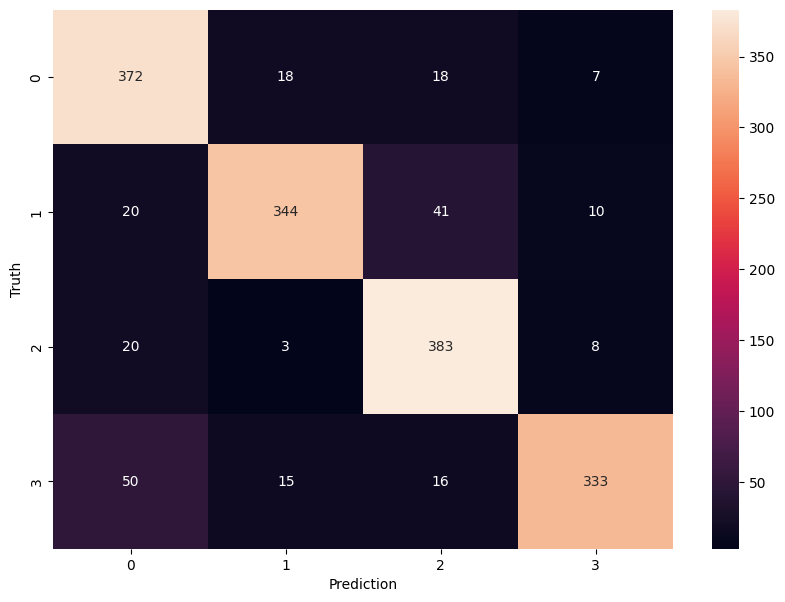

In [33]:
import seaborn as sn
import matplotlib.pyplot as plt


plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Prediction")
plt.ylabel("Truth")